# Método de la transformada inversa: distribución de Poisson

La distribución de Poisson sirve para modelar el número de ocurrencias de un cierto evento dentro de un intervalo de tiempo dado. Se define la variable aleatoria X como el número de ocurrencia de este evento en el intervalo de tiempo
dado, que puede tomar los valores enteros 0, 1, 2, etcétera. Para definir la distribución de Poisson es necesario conocer el promedio de ocurrencia denotado por el parámetro $\lambda$. La probabilidad de que la v.a. X tome el valor $x \geq 0$, con $\lambda>0$, esta dada por la función:

\begin{equation} 
P\,(x=X)=
\left\{
\begin{array}{rl}
\begin{alignedat}{2}
&e^{-\lambda}\frac{\lambda^{x}}{x!} && \qquad \text{si } x\in \left(\mathbb{N}\cup \{0 \}\right)\\
& 0  && \qquad \text{si } x \notin  \left(\mathbb{N}\cup\{ 0 \}\right)
\end{alignedat}
\end{array} \right.
\end{equation}

Si se quiere observar las ocurrencias del evento en un intervalo de longitud diferente al considerado originalmente (es decir el intervalo para el cuál el promedio es $\lambda$). Tal conteo de ocurrencias también sigue una distribución Poisson pero esta vez de parámetro $\lambda t$, con $t=\frac{intervalo\:actual}{intervalo\:original}$.

Para simular la ocurrencia de eventos en un proceso de Poisson de tasa $\lambda = 5/$h, hasta un tiempo $T=3$ h se utiliza el método de la función inversa, que consiste en encontrar la inversa de la función distribución acumulada (CDF, por sus siglas en inglés) para obtener números aleatorios que esten distribuidos según la CDF. Luego para la distribución de Poisson con $\lambda = 15$, como pide el problema, la CDF es:

$F_X(x)=P(X\leq x) = \sum^\infty_{x=0}e^{-15}\frac{15^{x}}{x!}$

y la funcion inversa para funciones discretas equivale a asignarle al número pseudoaleatorio generado $u$ la variale aleatoria $x_i$ si cumple:

$F_X(x_i-1)<u\leq F_X(x_i)$

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

Ya que la media de la distribución de Poisson buscada es 15 y la varianza es 15 voy a simular los casos entre 0 y 30, y sabiendo que la posibilidad de que ocurran casos con x mayor es muy baja, el valor $x=31$ va a tener asignada la probabilidad de todos los $x>30$.

In [2]:
n = 10000 #tamaño de la muestra
y = np.ones(n)*31
u = np.random.random(n) 
a = np.zeros(31)
b = mt.exp(-15)*np.ones(31)
c = mt.exp(-15)*np.ones(31)

for i in range(1,31):
    a[i] = b[i-1]
    b[i] = mt.exp(-15)*15**i/mt.factorial(i)+ b[i-1]
    c[i] = mt.exp(-15)*15**i/mt.factorial(i)
    for j in range(n):
        if (a[i] < u[j]) & (u[j] <= b[i]): y[j]=i
x,pdf = np.unique(y,return_counts=True)

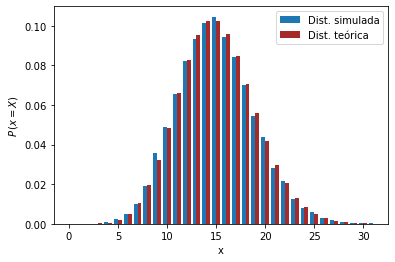

In [3]:
plt.bar(x,pdf/n,width=-0.4, align='edge', label='Dist. simulada')
plt.bar(np.arange(31),c, color='brown',width=0.4, align='edge',label='Dist. teórica')

plt.legend()
plt.xlabel('x')
plt.ylabel('$P\,(x=X)$')
plt.show()